In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [12]:
df = pd.read_excel('Bike Sales Dashboard.xlsx',index_col=0)
df

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
ID,,,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes


In [13]:
df.isna().sum()

Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [14]:
df.shape

(1000, 13)

In [15]:
df.describe()

,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,56360.000000,1.898000,1.442000,44.163000
std,31085.635215,1.628572,1.125123,11.364488
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12496 to 12121
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Martial Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Age Brackets      1000 non-null   object
 12  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(9)
memory usage: 109.4+ KB


In [17]:
df.duplicated().sum()

49

In [18]:
df = df.drop_duplicates()
df

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
ID,,,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes


In [19]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")

Martial Status: ['Married' 'Single']
Gender: ['Female' 'Male']
Income: [ 40000  30000  80000  70000  10000 160000  20000 120000  90000 170000
  60000 100000 130000 150000  50000 110000]
Children: [1 3 5 0 2 4]
Education: ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation: ['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner: ['Yes' 'No']
Cars: [0 1 2 4 3]
Commute Distance: ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' 'More than 10 Miles']
Region: ['Europe' 'Pacific' 'North America']
Age: [42 43 60 41 36 50 33 58 40 54 55 35 45 38 59 47 56 34 63 29 44 32 26 31
 62 30 28 65 48 66 46 52 39 61 37 68 51 25 49 53 27 67 57 70 78 69 64 89
 80 73 74 71 72]
Age Brackets: ['Middle Age' 'Old' 'Adolescent']
Purchased Bike: ['No' 'Yes']


In [20]:
df = df.drop(['Age Brackets'],axis=1) # age and age bracket both exist, redundancy in data
df

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
ID,,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes


In [21]:
le = LabelEncoder()
df['Martial Status'] = le.fit_transform(df['Martial Status'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Region'] = le.fit_transform(df['Region'])
df['Home Owner'] = le.fit_transform(df['Home Owner'])
df['Purchased Bike'] = le.fit_transform(df['Purchased Bike'])

In [22]:
df['Education'] = df['Education'].map({'Partial High School': 0, 'High School': 1, 'Partial College': 2, 'Bachelors': 3, 'Graduate Degree': 4})
df['Occupation'] = df['Occupation'].map({'Clerical': 0, 'Manual': 1,'Skilled Manual': 2,'Management': 3,'Professional': 4})
df['Commute Distance'] = df['Commute Distance'].map({'0-1 Miles': 0, '1-2 Miles': 1, '2-5 Miles': 2, '5-10 Miles': 3, 'More than 10 Miles': 4})

<AxesSubplot:>

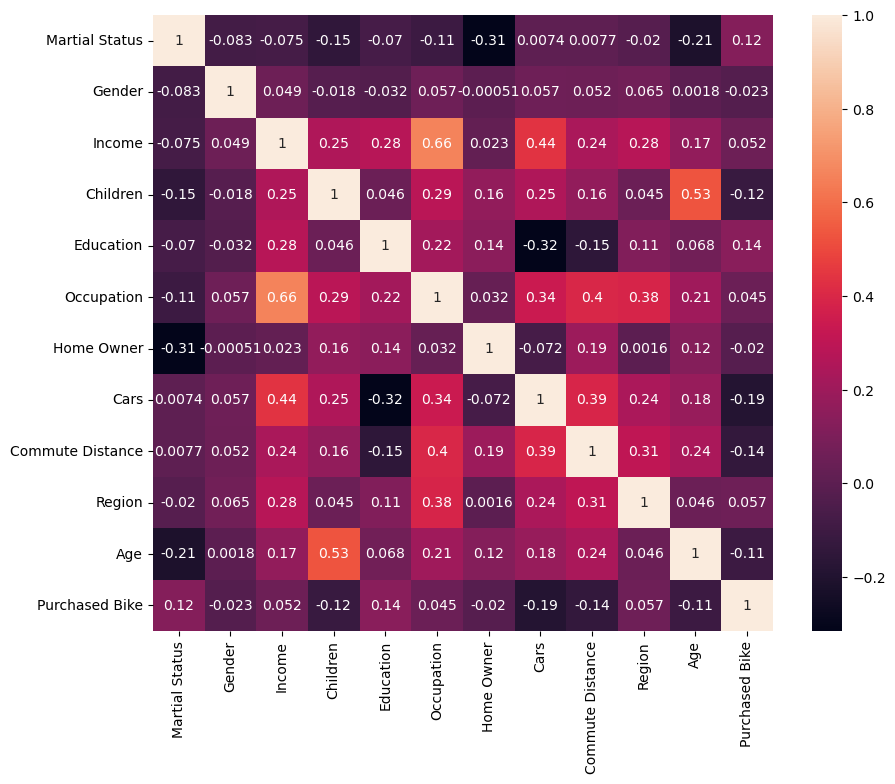

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [24]:
X = df.drop('Purchased Bike', axis=1)
y = df['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(760, 11)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Anish\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer= 'adam')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247 (988.00 B)

 Trainable params: 247 (988.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8,validation_data=(X_test, y_test))

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4479 - loss: 0.6973 - val_accuracy: 0.5131 - val_loss: 0.6912
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5313 - loss: 0.6922 - val_accuracy: 0.5131 - val_loss: 0.6889
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5444 - loss: 0.6888 - val_accuracy: 0.5131 - val_loss: 0.6865
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5008 - loss: 0.6882 - val_accuracy: 0.5131 - val_loss: 0.6832
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5577 - loss: 0.6728 - val_accuracy: 0.5131 - val_loss: 0.6800
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5159 - loss: 0.6787 - val_accuracy: 0.5445 - val_loss: 0.6752
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5615 - loss: 0.6746 - val_accuracy: 0.6283 - val_loss: 0.6717
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6190 - loss: 0.6643 - val_accuracy: 0.6492 - v

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print((accuracy*100))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6823 - loss: 0.6576 
67.01570749282837


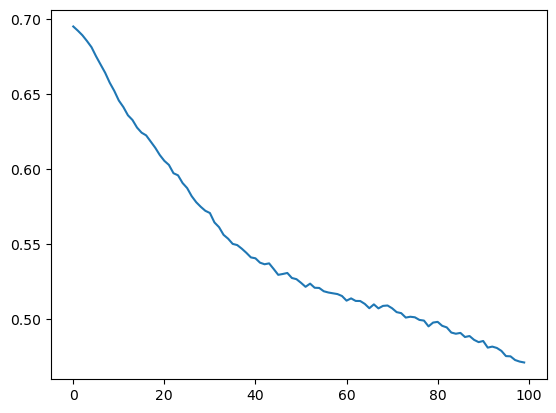

In [33]:
plt.plot(history.history['loss'])